<a href="https://colab.research.google.com/github/omsolanki/IITJ-ML-Ops/blob/main/M23CSA521_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Dataset Preparation
1.1. MNIST Dataset

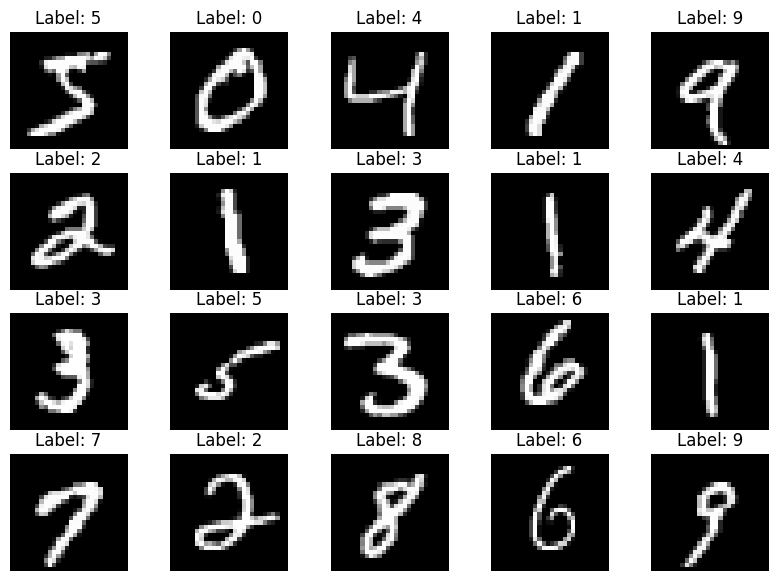

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Visualize 25 images
plt.figure(figsize=(10, 7))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Label: {train_labels[i]}')
    plt.axis('off')
plt.show()

# Preprocess the data by normalizing pixel values to the range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


1.2. Custom Dataset - Caltech-101

In [16]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
# Set the dataset path
data_dir = '/content/drive/MyDrive/DeepL/caltech-101/'

# Download caltech-101 dataset

!kaggle datasets download -d imbikramsaha/caltech-101 -p {data_dir} --force

# Zip file path
zipPath = data_dir + "caltech-101.zip"
print(f"Zip file path: {zipPath}")

# Unzip the file using Python string formatting
#!unzip {zipPath} -d {data_dir}
!unzip -q -o {zipPath} -d {data_dir}

Dataset URL: https://www.kaggle.com/datasets/imbikramsaha/caltech-101
License(s): CC0-1.0
 96% 125M/131M [00:01<00:00, 108MB/s]
100% 131M/131M [00:01<00:00, 122MB/s]
Zip file path: /content/drive/MyDrive/DeepL/caltech-101/caltech-101.zip


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the Caltech-101 dataset
(dataset_train, dataset_test), dataset_info = tfds.load(
    'caltech101',
    split=['train', 'test'],
    as_supervised=True,  # Loads data as (image, label) pairs
    with_info=True
)

# Visualize a few images from the training set
def visualize_data(dataset, num_images):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

visualize_data(dataset_train, 9)

# Preprocess the images
def preprocess(image, label):
    # Resize images to a fixed size (e.g., 128x128) and normalize
    image = tf.image.resize(image, (128, 128))
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
    return image, label

# Apply preprocessing
train_data = dataset_train.map(preprocess)
test_data = dataset_test.map(preprocess)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

In [24]:
!ls /content/drive/MyDrive/DeepL/caltech-101/
!ls /content/drive/MyDrive/DeepL/caltech-101/caltech-101/

caltech-101  caltech-101.zip
accordion	   ceiling_fan	    emu		   inline_skate  octopus    soccer_ball
airplanes	   cellphone	    euphonium	   joshua_tree	 okapi	    stapler
anchor		   chair	    ewer	   kangaroo	 pagoda     starfish
ant		   chandelier	    Faces	   ketch	 panda	    stegosaurus
BACKGROUND_Google  cougar_body	    Faces_easy	   lamp		 pigeon     stop_sign
barrel		   cougar_face	    ferry	   laptop	 pizza	    strawberry
bass		   crab		    flamingo	   Leopards	 platypus   sunflower
beaver		   crayfish	    flamingo_head  llama	 pyramid    tick
binocular	   crocodile	    garfield	   lobster	 revolver   trilobite
bonsai		   crocodile_head   gerenuk	   lotus	 rhino	    umbrella
brain		   cup		    gramophone	   mandolin	 rooster    watch
brontosaurus	   dalmatian	    grand_piano    mayfly	 saxophone  water_lilly
buddha		   dollar_bill	    hawksbill	   menorah	 schooner   wheelchair
butterfly	   dolphin	    headphone	   metronome	 scissors   wild_cat
camera		   dragonfly	    hedge

Found 9144 files belonging to 102 classes.
Using 7316 files for training.
Found 9144 files belonging to 102 classes.
Using 1828 files for validation.


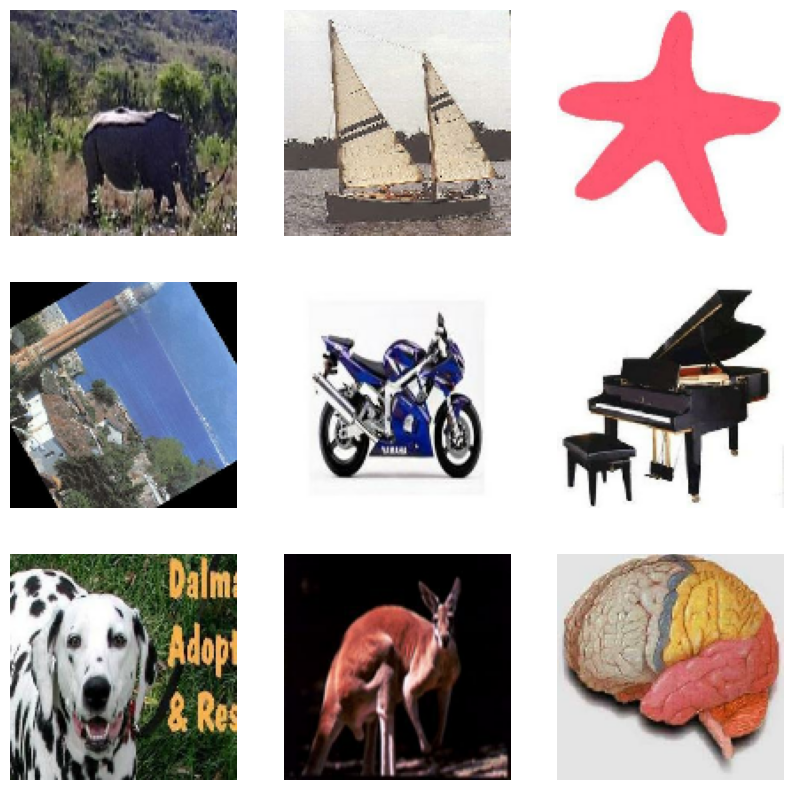

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# Set the dataset path
data_dir = '/content/drive/MyDrive/DeepL/caltech-101/caltech-101'  # Path to the extracted dataset

# Load the dataset using image_dataset_from_directory
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  # Split the dataset: 80% training, 20% validation
    subset="training",
    seed=123,  # For reproducibility
    image_size=(128, 128),  # Resize images to a fixed size (128x128)
    batch_size=32  # Batch size
)

validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

# Visualize a few images from the training set
def visualize_data(dataset, num_images):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):  # Take one batch
        for i in range(num_images):
            plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.axis('off')
    plt.show()

visualize_data(train_data, 9)

# Preprocess the images (normalization to [0, 1] is included in the dataset loader)
def preprocess(image, label):
    # Normalize the pixel values to [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Apply preprocessing (Optional since image_dataset_from_directory handles resizing)
train_data = train_data.map(preprocess)
validation_data = validation_data.map(preprocess)
